# <font color="blue">Submitted by: Kaspar Kadalipp </font>
# HW10. Dynamic Programming, time warping, choice of essay topic

### <font color='orange'> Less important code is placed here</font>
### <font color='orange'> Report is below </font>

In [1]:
%%capture
import pandas
from tabulate import tabulate
from dtw import *
import numpy as np

In [2]:
# Exercise 2

def ex2(a, b):
    def print_matrix(memory, title):
        print(title)
        display_matrix(memory, [f'a{i}' for i in range(b + 1)], [f'b{i}' for i in range(a + 1)], type='plain')
        print()

    memory = [[i1] + [0 if i1 else i2 + 1 for i2 in range(b)] for i1 in range(a + 1)]
    print_matrix(memory, 'Initialize matrix:')
    for i in range(1, a + 1):
        for j in range(1, b + 1):
            memory[i][j] = memory[i - 1][j] + memory[i][j - 1] + memory[i - 1][j - 1]
    print_matrix(memory, 'Bottom-up approach:')
    print(f'Magic number is {memory[a][b]}.')

In [3]:
# Exercise 3

def display_matrix(memory, column_labels, row_labels, type='plain'):
    df = pandas.DataFrame(memory, columns=column_labels, index=row_labels)
    print(tabulate(df, headers='keys', tablefmt=type, numalign="right"))


def levenshtein_distance(word1, word2):
    if len(word1) == 0: return len(word2)
    if len(word2) == 0: return len(word1)

    special_substitutions = [('t', 'd'), ('d', 't'), ('k', 'g'), ('g', 'k'), ('b', 'p'), ('p', 'b')]
    cost_insertion = 1
    cost_deletion = 1
    cost_transposition = 1

    memory = [[i1] + [0 if i1 else i2 + 1 for i2 in range(len(word2))] for i1 in range(len(word1) + 1)]

    for t1 in range(1, len(word1) + 1):
        for t2 in range(1, len(word2) + 1):
            if word1[t1 - 1] == word2[t2 - 1]:
                cost_substitution = 0
            else:
                if (word1[t1 - 1], word2[t2 - 1]) in special_substitutions:
                    cost_substitution = 0.5  #  t<->d = 0.5, k<->g = 0.5, b<->p
                else:
                    cost_substitution = 1

            lev_costs = [memory[t1 - 1][t2] + cost_deletion,
                         memory[t1][t2 - 1] + cost_insertion,
                         memory[t1 - 1][t2 - 1] + cost_substitution]

            #(switching 2 characters next to each other, ab <->ba).
            if t1 > 1 and t2 > 1 and word1[t1 - 2:t1] == word2[t2 - 2:t2][::-1]:
                lev_costs.append(memory[t1 - 2][t2 - 2] + cost_transposition)

            memory[t1][t2] = min(lev_costs)

    print()
    display_matrix(memory, [' '] + list(word2), [' '] + list(word1))
    print()
    print(f'Distance of "{word1}" from "{word2}" is {memory[len(word1)][len(word2)]}')

# Similar to https://en.wikipedia.org/wiki/Levenshtein_distance

In [4]:
# Exercise 4
# Used resource: https://towardsdatascience.com/dynamic-time-warping-3933f25fcdd

def ex4(plot=False):
    s1 = [2, 5, 5, 7, 9, 1, 6, 6, 8, 9, 1, 6, 6, 8, 9]
    s2 = [1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 7, 7, 8, 7]
    s3 = [4, 2, 1, 4, 8, 8, 9, 3, 2, 3, 2, 2, 6, 9, 2, 1, 1, 6, 1]
    s4 = [1, 5, 7, 3, 7, 2, 8, 9, 9, 2, 2, 3, 7, 8]
    s5 = [3, 2, 2, 1, 1, 8, 3, 2, 6, 9, 1, 6, 1]
    s6 = [1, 1, 1, 3, 3, 2, 1, 1, 7, 7, 7]
    values = [s1, s2, s3, s4, s5, s6]

    def euclideanDistance(val1, val2):
        return abs(val1 - val2)

    def dtw_(s, t):
        n, m = len(s), len(t)
        dtw_matrix = np.zeros((n + 1, m + 1))
        for i in range(n + 1):
            for j in range(m + 1):
                dtw_matrix[i, j] = np.inf
        dtw_matrix[0, 0] = 0

        for i in range(1, n + 1):
            for j in range(1, m + 1):
                cost = euclideanDistance(s[i - 1], t[j - 1])
                last_min = np.min([dtw_matrix[i - 1, j],  # minimum
                                   dtw_matrix[i, j - 1],  # insertion
                                   dtw_matrix[i - 1, j - 1]])  # match
                dtw_matrix[i, j] = cost + last_min

        return dtw_matrix[len(s)][len(t)]

    dtw_matrix = [[0 for _ in values] for _ in values]
    for row, val1 in enumerate(values):
        for col, val2 in enumerate(values):
            if val1 == val2:
                dtw_matrix[row][col] = 0
            else:
                dtw_matrix[row][col] = dtw_(val1, val2)

    if plot:
        dtw(s2, s6, keep_internals=True).plot(type="threeway", ylab="S 6", xlab="S 2")
        dtw(s2, s6, keep_internals=True, step_pattern=rabinerJuangStepPattern(6, "c")).plot(type="twoway", offset=-2,
                                                                                            ylab="Value")
        print()
    else:
        print("6x6 matrix, where matrix[i,j] is the distance between s_i and s_j.")
        print()
        display_matrix(dtw_matrix, ['s1', 's2', 's3', 's4', 's5', 's6'], ['s1', 's2', 's3', 's4', 's5', 's6'])

# EX1

##### Write in the report which article you are choosing. Attempt to summarise in a few sentences why you think it will be the most interesting article for you to choose. You don't have to necessarily make your essay on the choice of this homework, but it might give you a good start.

I will probably choose Graph Compression by BFS. I'm sure to encounter graphs in homeworks of upcoming courses, so learning about efficient graph compression gives me more options to further optimize my code. Alternative options would be Algorithms for Solving Rubik’s Cubes, since I haven't read about optimal algorithms for soling Rubik's cubes and I didn't previously know that an optimal solution is NP-hard.

# EX2

##### You are given the following recursive function:

```
def calculate_magic_number(a, b):
    if a == 0:
        return b
    if b == 0:
        return a

    return calculate_magic_number(a, b-1) + calculate_magic_number(a-1, b) + calculate_magic_number(a-1, b-1)
```
##### Draw a recursion call tree (a directed acyclic graph) for a=2 b=2 (calculate_magic_number(2, 2)), which demonstrates dependencies of calculations. How many overlapping calls to the function (function calls with the same arguments) are there?

##### How can you solve this recursion using bottom-up DP approach? Provide a DP solution to the problem.
##### What is the time complexity of initial recursive implementation? What is the time complexity for DP solution?

The initial complexity is $O((n+m)^3)$ since the recursive function calls itself 3 times, and it can call itself up to n+m-1 times.

The complexity of DP approach is $O(n \cdot m)$. Bottom-up approach starts looking at smaller subproblems and solves the larger subproblem using previous results.

In [5]:
ex2(a=2, b=2)

Initialize matrix:
      a0    a1    a2
b0     0     1     2
b1     1     0     0
b2     2     0     0

Bottom-up approach:
      a0    a1    a2
b0     0     1     2
b1     1     2     5
b2     2     5    12

Magic number is 12.


![ex1](https://i.imgur.com/3MemNXy.jpg)

# EX3

#####  Implement edit distance with following operations (insertion, deletion, substitution, transposition) calculation procedure.

##### Costs

- ##### Insertion 1
- ##### Deletion 1
- ##### Transposition 1 (switching 2 characters next to each other, ab <->ba).
- ##### Substitution costs (substituting one character with other): t<->d = 0.5, k<->g = 0.5, b<->p = 0.5. Everyhing else is 1.

##### Demonstrate with a few examples that your code works as intended. Confirm at least one result by hand.

##### Questions: What is the time and memory complexity of Edit Distance algorithm (consider that you want to reconstruct the sequence of operations)?

I implemented distance calculation using bottom-up dynamic programming. I reserve a matrix to hold the distances between all prefixes of the first string and all prefixes of the second, then I can compute the values in the matrix in a dynamic programming fashion, and thus find the distance between the two full strings as the last value computed.

The time complexity is $O(n \cdot m)$ where $n$ and $m$ are the lengths of the two words. Space complexity is $O(n \cdot m)$ as well.

![ex3](https://i.imgur.com/17uMWZC.png)

In [6]:
levenshtein_distance('kitty', 'kydt')


           k    y    d    t
      0    1    2    3    4
k     1    0    1    2    3
i     2    1    1    2    3
t     3    2    2  1.5    2
t     4    3    3  2.5  1.5
y     5    4    3  3.5  2.5

Distance of "kitty" from "kydt" is 2.5


In [7]:
levenshtein_distance('sunday', 'saturday')


           s    a    t    u    r    d    a    y
      0    1    2    3    4    5    6    7    8
s     1    0    1    2    3    4    5    6    7
u     2    1    1    2    2    3    4    5    6
n     3    2    2    2    3    3    4    5    6
d     4    3    3  2.5    3    4    3    4    5
a     5    4    3  3.5  3.5    4    4    3    4
y     6    5    4    4  4.5  4.5    5    4    3

Distance of "sunday" from "saturday" is 3


# EX4

##### Implement the Dynamic Time Warping algorithm and compare the following 6 sequences:

```
s1: 2 5 5 7 9 1 6 6 8 9 1 6 6 8 9
s2: 1 1 1 1 3 3 3 3 1 1 1 1 7 7 8 7
s3: 4 2 1 4 8 8 9 3 2 3 2 2 6 9 2 1 1 6 1
s4: 1 5 7 3 7 2 8 9 9 2 2 3 7 8
s5: 3 2 2 1 1 8 3 2 6 9 1 6 1
s6: 1 1 1 3 3 2 1 1 7 7 7
```

##### Calculate pairwise DTW distances between all 6 sequences, you should end up with 6x6 matrix, where matrix[i,j] is the distance between s_i and s_j.

##### Take the most similar pair of sequences (DTW result is minimum) and visualise the DTW calculation in some way. Draw lines, where data points between two sequences are aligned.



I implemented the algorithm introduced in the lecture. Using it to compare all 6 sequences the most similar pair was S2 and S5, because the distance between them is lowest, that can also be seen from the graph.

In [8]:
ex4()

6x6 matrix, where matrix[i,j] is the distance between s_i and s_j.

      s1    s2    s3    s4    s5    s6
s1     0    32    26    17    25    34
s2    32     0    44    33    29     2
s3    26    44     0    27     7    41
s4    17    33    27     0    26    32
s5    25    29     7    26     0    27
s6    34     2    41    32    27     0


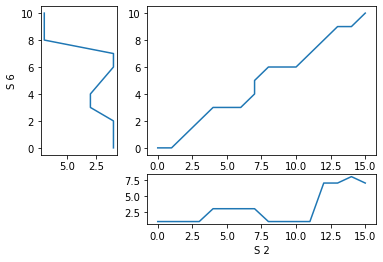

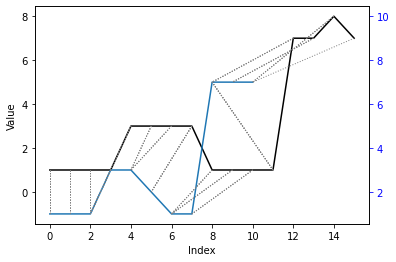

In [9]:
ex4(plot=True)

# EX5

##### Demonstrate the 1/0 knapsack problem on the following data (choosing the weight constraint as 11, maximizing the cost):

Name Cost Weight
O1 1 1
O2 7 4
O3 14 7
O4 3 2

##### Explain what is a knapsack problem. Solve it using the dynamic programming approach. Draw the table and explain how it is filled. Show how to get the selected elements. Make an example of a practical problem that can be solved with this approach. What is the space complexity of this solution?



In the knapsack problem, you need to pack a set of items, with given values and sizes (such as weights or volumes), into a container with a maximum capacity. If the total size of the items exceeds the capacity, you can't pack them all. In that case, the problem is to choose a subset of the items of maximum total value that will fit in the container. 1/0 means each item can only be picked once.

A typical real life example would be fitting as many items as possible into a carry-on-bag for a flight, as they have weight limit. Another application would be studying the day before the exam, I want to maximise the points but my time is limited. I can optimize my efforts by analyzing previous question papers and decide which topics are more important and have a higher probability of being on the exam. So I either skip a whole topic or thoroughly study it. Some topics also take longer to learn than others, so I need to choose the topics wisely.

The space complexity is $O(n \cdot w)$ where n is the number of elements and w the weight constraint.

Table is filled row by row. First row only considers O_1, the row is filled with ones since it can be picked only once. Second row considers O_2 as well, now every value takes O_1 into consideration as well. Element is selected if selecting it improves the previous best cost. Comparing values is visualized below. This process continues until all rows are filled (all elements are taken into consideration) and the best cost will be the last element of the last row.

<font color="gray" size="-2">from: https://developers.google.com/optimization/bin/knapsack/</font>

![ex5_1](https://i.imgur.com/ZyedzsZ.png)
![ex5_2](https://i.imgur.com/UMBoDNk.png)

# Algorithmics# EX6

##### Design an efficient algorithm (using dynamic programming, of course) to a) maximise and b) minimise the arithmetic expressions by adding missing *, +, (, ). I.e., given a list of numbers, e.g. 2 1 3 4, calculate the maximizing placement of operations. E.g. (2*1)+(3+4)=9, and (2+1)*3*4=36. Implement it and optimise the possible value of an arithmetic expression with *, +, (, ) for the following sequence where they had been "removed":

```
[2, 2, 2, 2, 0.4, 1, 0.2, 1, 10, 7, 8, 0.6, 2, 5, 4, 0.1, 1, 1, 7, 1, 0.2, 10, 3, 1, 1, 2, 4, 1, 1, 1, 2, 0.8, 3, 1, 2, 0.1, 2, 1, 2, 0.3, 1, 7, 2, 0.6]
```
##### Start by writing down the recurrence you base your solution on. Draw/show a small example (e.g. 3/4 numbers) using your recurrence. Draw the recursion/dependency graph on the small example. Discuss how you can solve it using DP. Now actually solve it (find min and max values of the given longer sequence).
# <font size="20" color="red">TODO</font>

# EX7

#####  Liza Pover and her little brother Lie Pover want to share a round pizza pie that has been cut into 2n equal sector slices along rays from the center at angles αi = iπ/n for i ∈ {0, 1, . . . , 2n}, where α0 = α2n. Each slice i between angles αi and αi + 1 has a known integer tastiness ti (which might be negative). To be “fair” to her little brother, Liza decides to eat slices in the following way:

![task](https://courses.cs.ut.ee/MTAT.03.238/2022_fall/uploads/Main/pizza1.png)
##### They will each take turns choosing slices of pizza to eat: Liza starts as the chooser.
##### If there is only one slice remaining, the chooser eats that slice, and eating stops.
##### Otherwise the chooser does the following:
- ##### Angle αi is proper if there is at least one uneaten slice on either side of the line passing through the center of the pizza at angle αi.
- ##### The chooser picks any number i ∈ {1, . . . , 2n} where αi is proper, and eats all uneaten slices counter-clockwise around the pizza from angle αi to angle αi + π.
- ##### Once the chooser has eaten, the other sibling becomes the chooser, and eating continues.

##### Liza wants to maximize the total tastiness of slices she will eat. Describe an O(n3)-time algorithm to find the maximum total tastiness Liza can guarantee herself via this selection process.

# <font size="20" color="red">TODO</font>